In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 데이터 불러오기
train = pd.read_csv('../Data/train.csv')
test = pd.read_csv('../Data/Submission.csv')

In [3]:
for feat in ['customer_idx', 'lead_owner', 'ver_cus', 'ver_pro', 'expected_timeline']:
    train[feat] = train[feat].astype(object)
    test[feat] = test[feat].astype(object)

In [4]:
# class별 value_counts로 그리기
def plot_pie_chart(train, test, feat_names):
    fig, axs = plt.subplots(len(feat_names), 1, figsize=(16, 64))
    axs = axs.flatten()
    
    for i, feat_name in enumerate(feat_names):
        train_set = set(train[feat_name])
        test_set = set(test[feat_name])

        both_set = train_set & test_set
        only_train = train_set - both_set
        only_test = test_set - both_set

        num_train, num_test, num_both = 0, 0, 0
        for cls in only_train:
            num_train += len(train[train[feat_name] == cls])
                             
        for cls in only_test:
            num_test += len(test[test[feat_name] == cls])
                            
        for cls in both_set:
            num_both += len(train[train[feat_name] == cls]) + len(test[test[feat_name] == cls])

        # 각 집합의 크기 계산
        sizes = [num_train, num_both, num_test]
        labels = ['Only Train', 'Both', 'Only Test']
        colors = ['lightcoral', 'lightskyblue', 'lightgreen']

        # 파이 차트 그리기
        axs[i].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
        axs[i].axis('equal')
        axs[i].set_title(f'{feat_name}')

    plt.tight_layout()
    plt.show()

# # class의 unique로 그리기
# def plot_pie_chart(train, test, feat_names):
#     fig, axs = plt.subplots(len(feat_names), 1, figsize=(16, 64))
#     axs = axs.flatten()
    
#     for i, feat_name in enumerate(feat_names):
#         train_set = set(train[feat_name])
#         test_set = set(test[feat_name])

#         both_set = train_set & test_set
#         only_train = train_set - both_set
#         only_test = test_set - both_set

#         # 각 집합의 크기 계산
#         sizes = [len(only_train), len(both_set), len(only_test)]
#         labels = ['Only Train', 'Both', 'Only Test']
#         colors = ['lightcoral', 'lightskyblue', 'lightgreen']

#         # 파이 차트 그리기
#         axs[i].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
#         axs[i].axis('equal')
#         axs[i].set_title(f'{feat_name}')

#     plt.tight_layout()
#     plt.show()


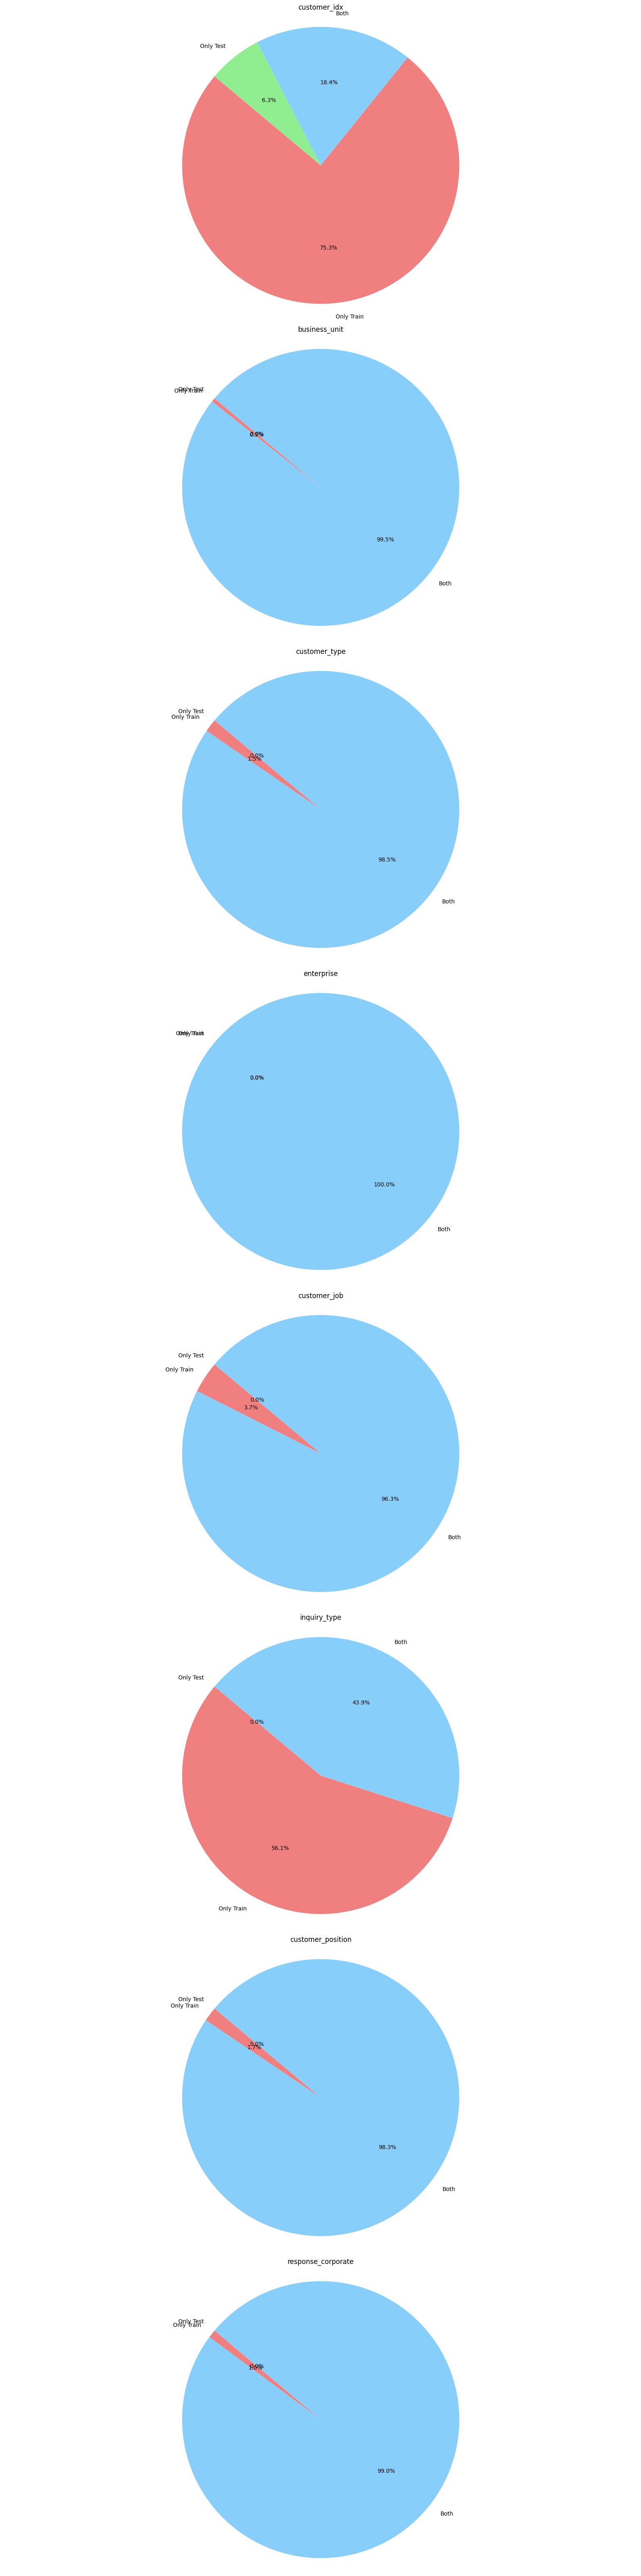

In [5]:
# 열 이름 리스트
feat_names = ['customer_idx', 'business_unit','customer_type', 'enterprise',
              'customer_job','inquiry_type','customer_position','response_corporate']

# 파이 차트 그리기
plot_pie_chart(train, test, feat_names)

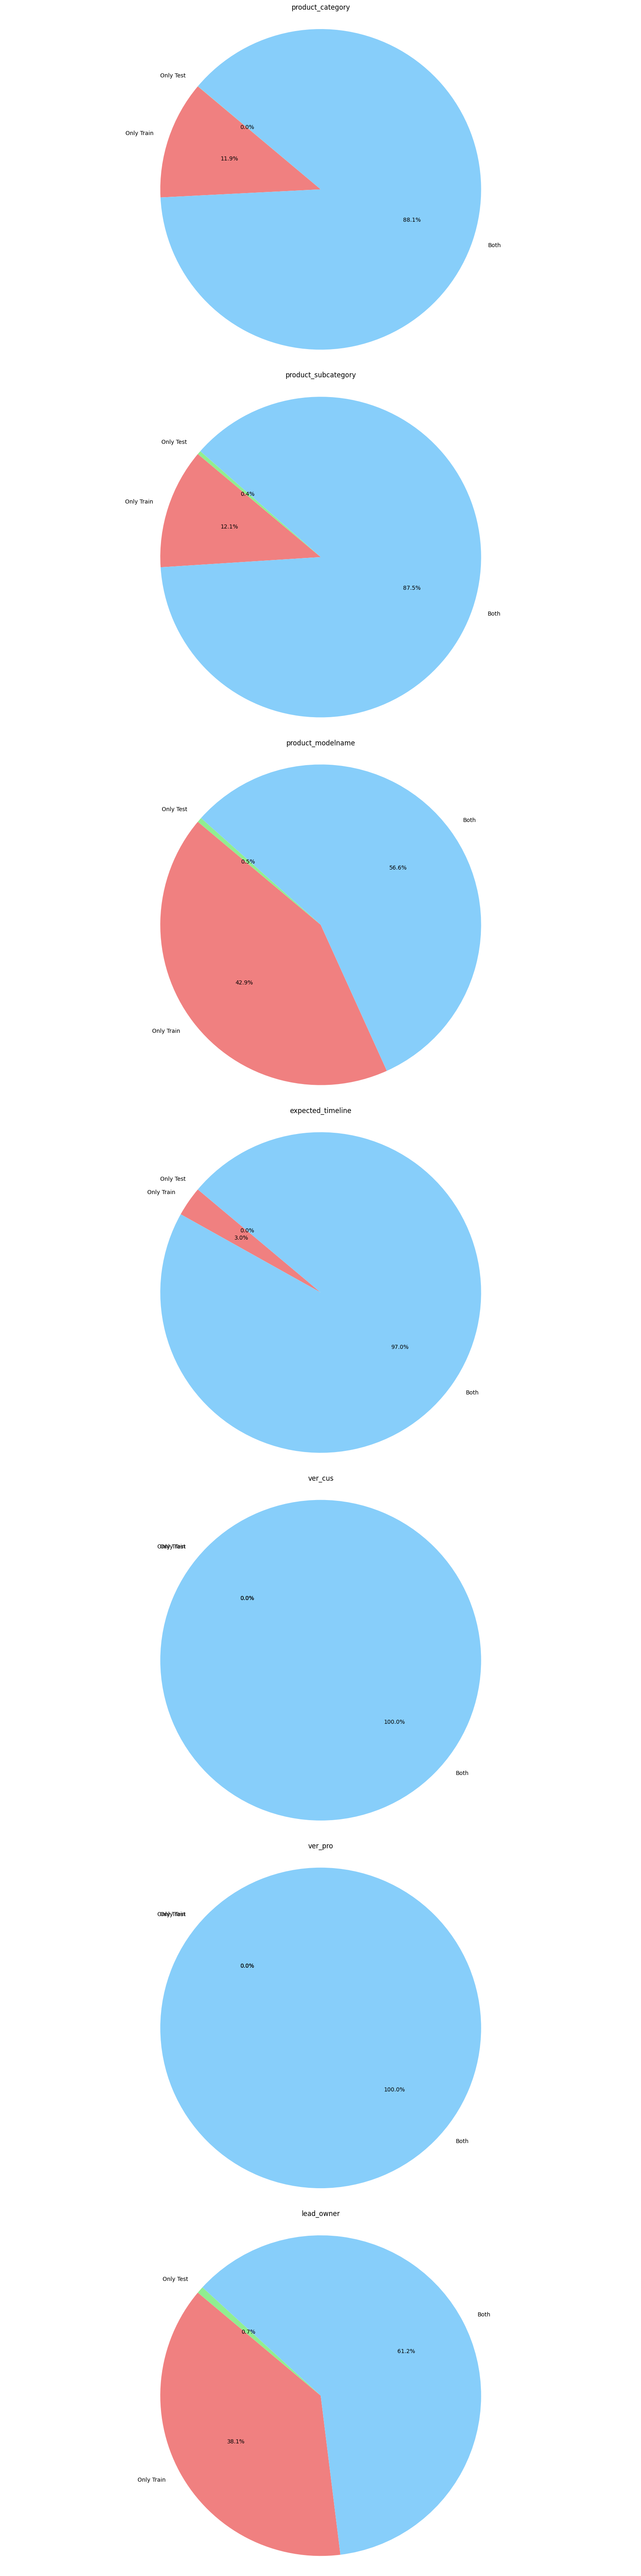

In [6]:
# 열 이름 리스트
feat_names = ['product_category','product_subcategory', 'product_modelname', 'expected_timeline',
             'ver_cus','ver_pro','lead_owner']

# 파이 차트 그리기
plot_pie_chart(train, test, feat_names)

In [7]:
# class별 value_counts로 그리기
def plot_pie_chart_fillna(train, test, feat_names):
    fig, axs = plt.subplots(len(feat_names), 1, figsize=(16, 64))
    axs = axs.flatten()
    
    for i, feat_name in enumerate(feat_names):
        train_set = set(train[feat_name])
        test_set = set(test[feat_name])

        both_set = train_set & test_set
        only_train = train_set - both_set
        only_test = test_set - both_set

        num_train, num_test, num_both, num_na = 0, 0, 0
        num_na = train[feat_name].isna().sum() + test[feat_name].isna().sum()
        for cls in only_train:
            num_train += len(train[train[feat_name] == cls])
                             
        for cls in only_test:
            num_test += len(test[test[feat_name] == cls])
                            
        for cls in both_set:
            num_both += len(train[train[feat_name] == cls]) + len(test[test[feat_name] == cls])

        # 각 집합의 크기 계산
        sizes = [num_train, num_both, num_test, num_na]
        labels = ['Only Train', 'Both', 'Only Test', 'UNK']
        colors = ['lightcoral', 'lightskyblue', 'lightgreen', 'lightgray']

        # 파이 차트 그리기
        axs[i].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
        axs[i].axis('equal')
        axs[i].set_title(f'{feat_name}')

    plt.tight_layout()
    plt.show()

# # class의 unique로 그리기
# def plot_pie_chart_fillna(train, test, feat_names):
#     fig, axs = plt.subplots(len(feat_names), 1, figsize=(16, 64))
#     axs = axs.flatten()
    
#     for i, feat_name in enumerate(feat_names):
#         train_set = set(train[feat_name])
#         test_set = set(test[feat_name])

#         both_set = train_set & test_set
#         only_train = train_set - both_set
#         only_test = test_set - both_set

#         # 각 집합의 크기 계산
#         sizes = [len(only_train), len(both_set), len(only_test)]
#         labels = ['Only Train', 'Both', 'Only Test']
#         colors = ['lightcoral', 'lightskyblue', 'lightgreen']

#         # 파이 차트 그리기
#         axs[i].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
#         axs[i].axis('equal')
#         axs[i].set_title(f'{feat_name}')

#     plt.tight_layout()
#     plt.show()


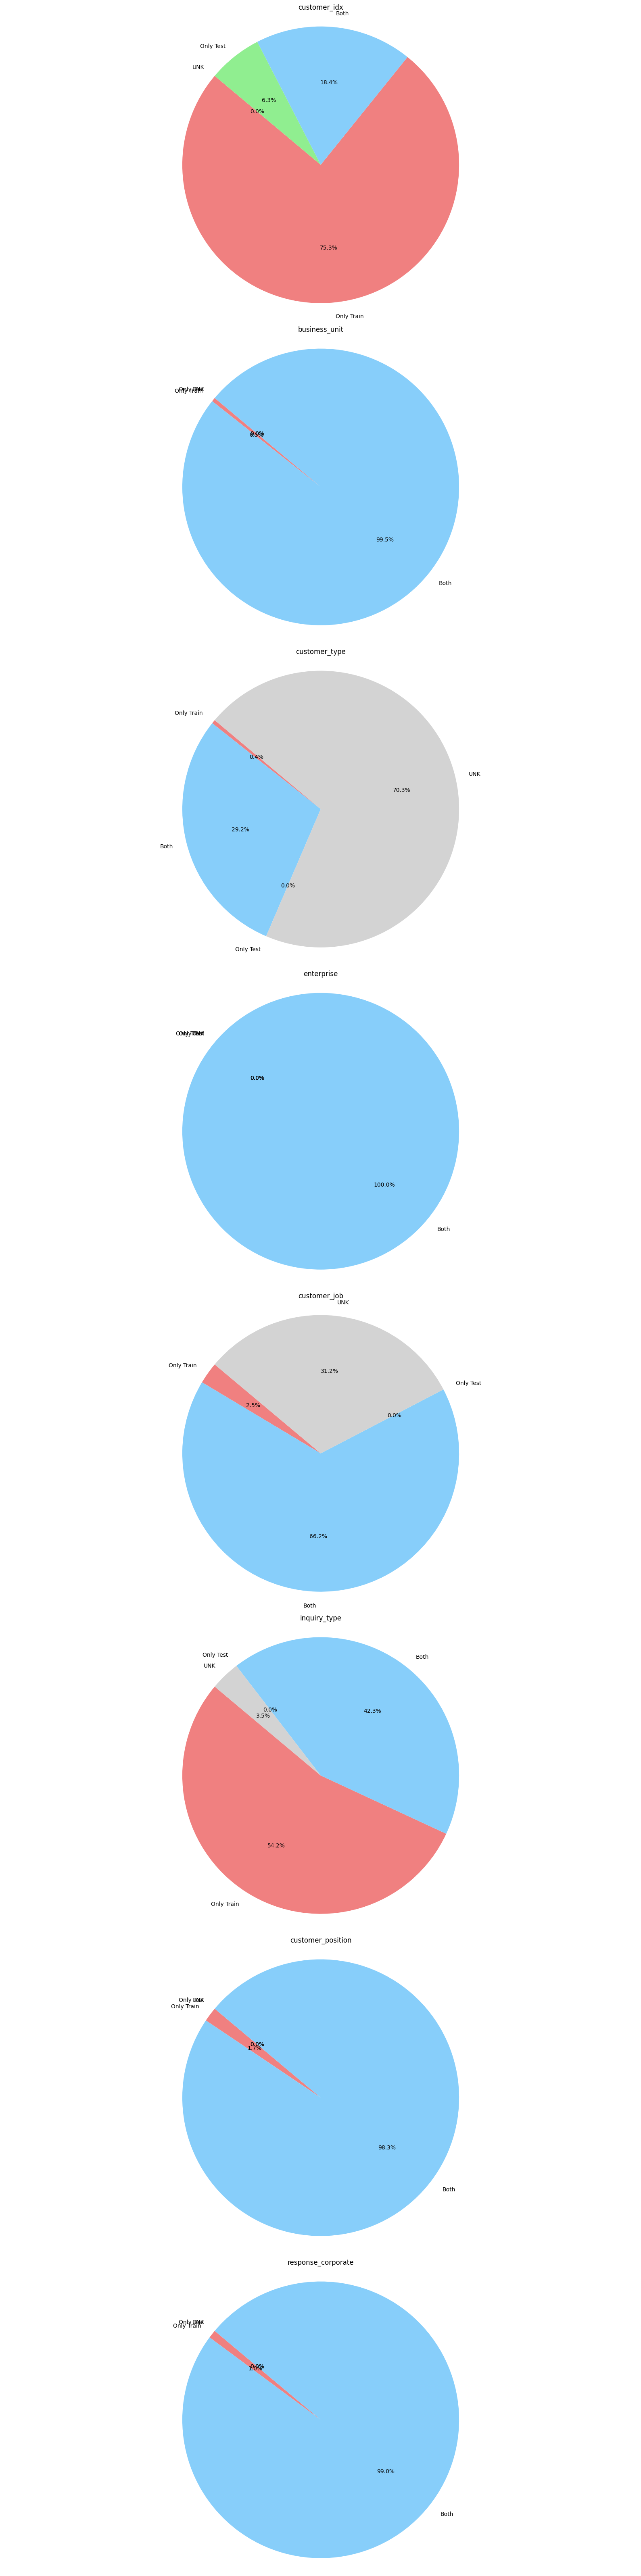

In [8]:
# 열 이름 리스트
feat_names = ['customer_idx', 'business_unit','customer_type', 'enterprise',
              'customer_job','inquiry_type','customer_position','response_corporate']

# 파이 차트 그리기
plot_pie_chart_fillna(train, test, feat_names)

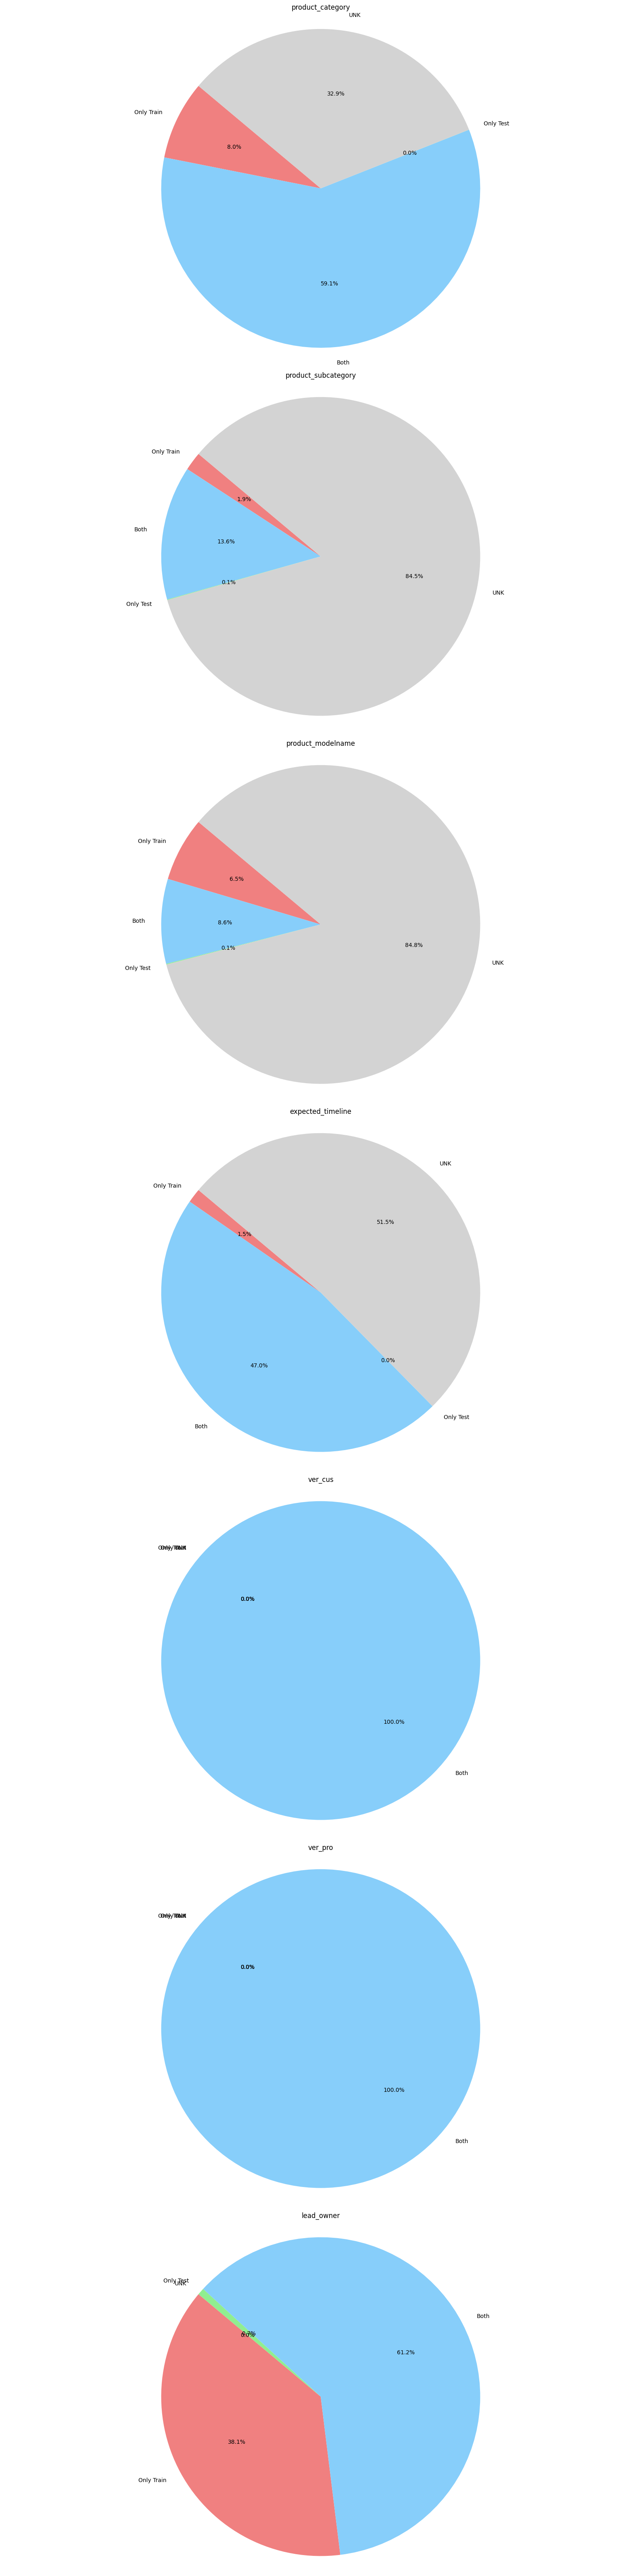

In [9]:
# 열 이름 리스트
feat_names = ['product_category','product_subcategory', 'product_modelname', 'expected_timeline',
             'ver_cus','ver_pro','lead_owner']

# 파이 차트 그리기
plot_pie_chart_fillna(train, test, feat_names)